In [7]:
# Weather Example
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt   # The default processing plot platform for python
import statsmodels.api as sm      # Scipy or sklearn or statmodels.api
import statsmodels.formula.api as smf # A way to do forward and backward selections
import seaborn as sn  # A fancier way to plot things with nice animations and color patterns

In [8]:
Data = pd.read_csv('weatherAUS.csv')
Data['intercept'] = np.ones(Data.shape[0])
Data

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RISK_MM,RainTomorrow,intercept
0,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0.0,No,1.0
1,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0.0,No,1.0
2,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0.0,No,1.0
3,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,1.0,No,1.0
4,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0.2,No,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,3.5,21.8,0.0,31.0,15.0,13.0,59.0,27.0,1024.7,1021.2,9.4,20.9,0.0,No,1.0
142189,2.8,23.4,0.0,31.0,13.0,11.0,51.0,24.0,1024.6,1020.3,10.1,22.4,0.0,No,1.0
142190,3.6,25.3,0.0,22.0,13.0,9.0,56.0,21.0,1023.5,1019.1,10.9,24.5,0.0,No,1.0
142191,5.4,26.9,0.0,37.0,9.0,9.0,53.0,24.0,1021.0,1016.8,12.5,26.1,0.0,No,1.0


In [9]:
# Construct a logistic regression model
X = Data.drop(columns=['Rainfall','RISK_MM'])
Y = Data['RainTomorrow']

logistic_model = sm.GLM(Y, X, family=sm.families.Binomial())
logistic_model = logistic_model.fit()

logistic_model.summary()

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [18]:
Y

0         No
1         No
2         No
3         No
4         No
          ..
142188    No
142189    No
142190    No
142191    No
142192    No
Name: RainTomorrow, Length: 142193, dtype: object

In [19]:
X = Data.drop(columns=['RainTomorrow','RISK_MM'])
Y = Data['RainTomorrow']
Y = Y.astype('category')
Y = pd.get_dummies(Y, drop_first=True).iloc[:,0] # Drop the baseline, already included in the intercept
print(Y)

logistic_model = sm.GLM(Y, X, family=sm.families.Binomial())
logistic_model = logistic_model.fit()

logistic_model.summary()

0         0
1         0
2         0
3         0
4         0
         ..
142188    0
142189    0
142190    0
142191    0
142192    0
Name: Yes, Length: 142193, dtype: uint8


MissingDataError: exog contains inf or nans

In [16]:
?X.fillna

In [20]:
#X = X.fillna(0)                                                # Either replace the NaNs with a value
X = X.fillna(method='ffill')
X = X.dropna()                                                 # Or remove the NaNs
logistic_model = sm.GLM(Y, X, family=sm.families.Binomial())
logistic_model = logistic_model.fit()

logistic_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                    Yes   No. Observations:               142193
Model:                            GLM   Df Residuals:                   142180
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -54186.
Date:                Wed, 06 Oct 2021   Deviance:                   1.0837e+05
Time:                        14:33:24   Pearson chi2:                 1.76e+05
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
MinTemp           0.0459      0.004     11.705      0.000       0.038       0.054
MaxTemp          -0.0264      0.006     -4.444      0.000      -0.038      -0.015
Rainfall          0.0260      0.001     24.394      0.000       0.024       0.028
WindGustSpeed     0.0482      0.001     57.453      0.000       0.047       0.050
WindSpeed9am     -0.0106      0.001     -9.109      0.000      -0.013      -0.008
WindSpeed3pm     -0.0224      0.001    -19.604      0.000      -0.025      -0.020
Humidity9am       0.0097      0.001     12.073      0.000       0.008       0.011
Humidity3pm       0.0504      0.001     60.513      0.000       0.049       0.052
Pressure9am       0.1130      0.004     26.145      0.000       0.105       0.121
Pressure3pm      -0.1755      0.004    -40.006      0.000      -0.184      -0.167
Temp9am           0.0197      0.006      3.322      0.001       0.008       0.031
Temp3pm          -0.0449      0.006     -7.067      0.000      -0.057      -0.032
intercept        57.4624      1.366     42.056      0.000      54.784      60.140
=================================================================================
"""

In [21]:
print(logistic_model.params)               # Coefficients
coeffs = logistic_model.params.values      # Coefficients as an array for np.dot

X_tst = X                                  # Values to test
y_pred = np.dot(X_tst,coeffs)              # Logit(p) = X*beta
print(y_pred)

p_pred = 1/(1+np.exp(-y_pred))             # Probability of Y = 1
p_pred

# Individual Log-likelihood calculation
print('\n\n Individualized Log-likelihood')
Y*np.log(p_pred) + (1-Y)*np.log(1-p_pred)

MinTemp           0.045936
MaxTemp          -0.026398
Rainfall          0.025982
WindGustSpeed     0.048216
WindSpeed9am     -0.010648
WindSpeed3pm     -0.022363
Humidity9am       0.009676
Humidity3pm       0.050400
Pressure9am       0.113022
Pressure3pm      -0.175482
Temp9am           0.019707
Temp3pm          -0.044913
intercept        57.462364
dtype: float64
[-2.82475773 -2.97044065 -3.06513558 ... -4.75972546 -3.75054818
 -4.16656762]


 Individualized Log-likelihood


0        -0.057630
1        -0.050009
2        -0.045592
3        -0.013164
4        -0.136323
            ...   
142188   -0.016145
142189   -0.013996
142190   -0.008531
142191   -0.023233
142192   -0.015386
Name: Yes, Length: 142193, dtype: float64

In [22]:
# Sum of the log-likelihoods
print('\nLog-likelihood = Sum of individualized log-likelihoods')
np.sum(Y*np.log(p_pred) + (1-Y)*np.log(1-p_pred))


Log-likelihood = Sum of individualized log-likelihoods


-54186.40875814495

Text(0, 0.5, 'Probability = p_pred = 1/(1+exp(-X*beta))')

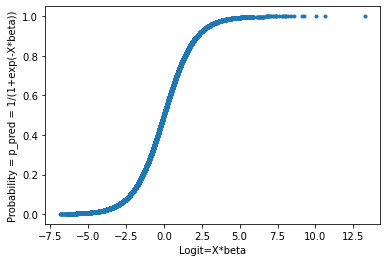

In [23]:
# Making sense of how good is the logistic regression performing
plt.plot(y_pred,p_pred,'.')
plt.xlabel('Logit=X*beta')
plt.ylabel('Probability = p_pred = 1/(1+exp(-X*beta))')

Number of predictions that are between 0.3 and 0.7 are:  27367
Percentage of predictions that are between 0.3 and 0.7 are:  19.0 %


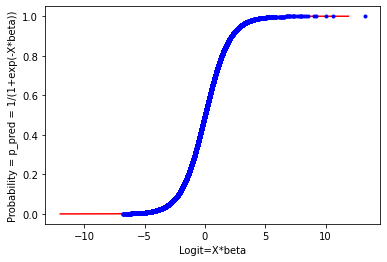

In [24]:
# Making sense of how good is the logistic regression performing
# Plot the classifier
Y_spread = np.arange(-12,12,0.1)
plt.plot(Y_spread,1/(1+np.exp(-Y_spread)),'r',y_pred,p_pred,'b.')
plt.xlabel('Logit=X*beta')
plt.ylabel('Probability = p_pred = 1/(1+exp(-X*beta))');

# The training classifications are in the poor region of the classifier, indiciating that the model is not reliable
print('Number of predictions that are between 0.3 and 0.7 are: ', np.max(np.shape(np.where(abs(p_pred-0.5) < 0.2))))
print('Percentage of predictions that are between 0.3 and 0.7 are: ', np.round(100*np.max(np.shape(np.where(abs(p_pred-0.5) < 0.2)))/len(Y)),'%')


The Area Under the ROC Curve is :  0.845023813431787


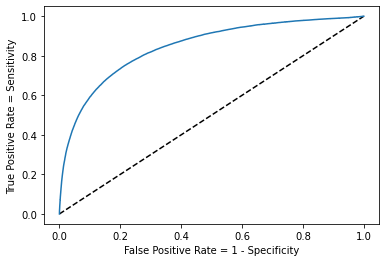

In [25]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(Y, p_pred);
plt.plot([0, 1], [0, 1], 'k--');
plt.plot(fpr, tpr);
plt.xlabel('False Positive Rate = 1 - Specificity')
plt.ylabel('True Positive Rate = Sensitivity')
print('\nThe Area Under the ROC Curve is : ', metrics.auc(fpr,tpr))

In [26]:
Y_pred = pd.DataFrame() # Declare a panda
threshold = 0.5
Y_pred['Class_true'] = Y
Y_pred['Class_pred'] = 1*(p_pred>threshold)
Y_pred['P_pred'] = p_pred
Y_pred['TP'] = 1*((Y_pred['Class_true']==1) & (Y_pred['Class_pred'] == 1))
Y_pred['FP'] = 1*((Y_pred['Class_true']==0) & (Y_pred['Class_pred'] == 1))
Y_pred['TN'] = 1*((Y_pred['Class_true']==0) & (Y_pred['Class_pred'] == 0))
Y_pred['FN'] = 1*((Y_pred['Class_true']==1) & (Y_pred['Class_pred'] == 0))
Y_pred

,Class_true,Class_pred,P_pred,TP,FP,TN,FN
0,0,0,0.056001,0,0,1,0
1,0,0,0.048779,0,0,1,0
2,0,0,0.044569,0,0,1,0
3,0,0,0.013077,0,0,1,0
4,0,0,0.127439,0,0,1,0
...,...,...,...,...,...,...,...
142188,0,0,0.016015,0,0,1,0
142189,0,0,0.013898,0,0,1,0
142190,0,0,0.008495,0,0,1,0
142191,0,0,0.022965,0,0,1,0


In [27]:
#Summary of results
threshold = 0.5                                                # Default threshold = 0.5
threshold = np.sum(1*(Y==1))/len(Y)                            # Recommended threshold = n_1/n
Y_pred = pd.DataFrame() # Declare a panda
Y_pred['Class_true'] = Y
Y_pred['Class_pred'] = 1*(p_pred>threshold)
Y_pred['P_pred'] = p_pred
Y_pred['TP'] = 1*((Y_pred['Class_true']==1) & (Y_pred['Class_pred'] == 1))
Y_pred['FP'] = 1*((Y_pred['Class_true']==0) & (Y_pred['Class_pred'] == 1))
Y_pred['TN'] = 1*((Y_pred['Class_true']==0) & (Y_pred['Class_pred'] == 0))
Y_pred['FN'] = 1*((Y_pred['Class_true']==1) & (Y_pred['Class_pred'] == 0))
Y_pred


from sklearn import metrics
print('Confusion matrix\n', metrics.confusion_matrix(Y_pred['Class_true'],Y_pred['Class_pred']))
print('\nNormalized Confusion Matrix\n', metrics.confusion_matrix(Y_pred['Class_true'],Y_pred['Class_pred'])/np.shape(Y_pred)[0])

print('\n#################################')
print('Python quick outputs')
print('#################################')
print('Accuracy = ', metrics.accuracy_score(Y_pred['Class_true'],Y_pred['Class_pred']))
print('Precision = ', metrics.precision_score(Y_pred['Class_true'],Y_pred['Class_pred']))
print('Recall = ', metrics.recall_score(Y_pred['Class_true'],Y_pred['Class_pred']))
print('F1 = ', metrics.f1_score(Y_pred['Class_true'],Y_pred['Class_pred']))

print('\n#################################')
print('Calculated outputs given the threshold ', threshold)
print('#################################')
TP = np.sum(Y_pred['TP']) # True positives
FP = np.sum(Y_pred['FP']) # False positives
TN = np.sum(Y_pred['TN']) # True negatives
FN = np.sum(Y_pred['FN']) # False negatives
TPR = TP/(TP+FN)          # True positive rate
TNR = TN/(TN+FP)          # True negative rate
Pr = TP/(TP+FP)
Re = TP/(TP+FN)
acc = (TP+TN)/(TP+FP+FN+TN)
bal_acc = (TPR+TNR)/2
F1 = 2*(Pr*Re)/(Pr+Re)
print('\nTrue Positives = ', TP)
print('False Positives = ', FP)
print('True Negatives = ', TN)
print('False Negatives = ', FN)
print('Sensitivity = Recall = True Positive Rate = ', TPR)
print('Specificity = 1 - False Positive Rate = True Negative Rate = ', TNR)
print('\nAccuracy = ', acc)
print('Balanced Accuracy = ', bal_acc)
print('Precision = ', Pr)
print('Recall = ', Re)
print('F1 = ', F1)



Confusion matrix
 [[85878 24438]
 [ 7740 24137]]

Normalized Confusion Matrix
 [[0.60395378 0.171865  ]
 [0.05443306 0.16974816]]

#################################
Python quick outputs
#################################
Accuracy =  0.7737019403205503
Precision =  0.4969016984045291
Recall =  0.757191705618471
F1 =  0.6000348033610103

#################################
Calculated outputs given the threshold  0.22418121848473554
#################################

True Positives =  24137
False Positives =  24438
True Negatives =  85878
False Negatives =  7740
Sensitivity = Recall = True Positive Rate =  0.757191705618471
Specificity = 1 - False Positive Rate = True Negative Rate =  0.7784727510062004

Accuracy =  0.7737019403205503
Balanced Accuracy =  0.7678322283123358
Precision =  0.4969016984045291
Recall =  0.757191705618471
F1 =  0.6000348033610103



The Area Under the ROC Curve is :  0.8449330492955263


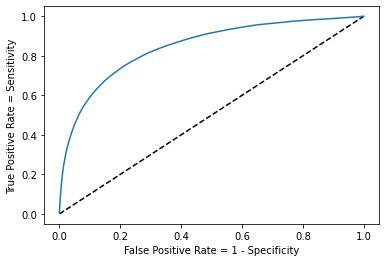

In [28]:
# Hand calculate the ROC curve at different thresholds
k = 0
threshold_range = np.arange(0,1,0.01)
n_th = len(threshold_range)
FPR = -1*np.ones(n_th)
TPR = -1*np.ones(n_th)
for th in threshold_range:
    threshold = th
    Y_pred['Class_true'] = Y
    Y_pred['Class_pred'] = 1*(p_pred>threshold)
    Y_pred['P_pred'] = p_pred
    TP = np.sum(1*((Y_pred['Class_true']==1) & (Y_pred['Class_pred'] == 1))) # True positives
    FP = np.sum(1*((Y_pred['Class_true']==0) & (Y_pred['Class_pred'] == 1))) # False positives
    TN = np.sum(1*((Y_pred['Class_true']==0) & (Y_pred['Class_pred'] == 0))) # True negatives
    FN = np.sum(1*((Y_pred['Class_true']==1) & (Y_pred['Class_pred'] == 0))) # False negatives
    TPR[k] = TP/(TP+FN)          # True positive rate
    FPR[k] = FP/(TN+FP)          # False positive rate
    k = k + 1

plt.plot([0, 1], [0, 1], 'k--');
plt.plot(FPR,TPR)
plt.xlabel('False Positive Rate = 1 - Specificity')
plt.ylabel('True Positive Rate = Sensitivity')
print('\nThe Area Under the ROC Curve is : ', metrics.auc(FPR,TPR))
    